In [2]:
import numpy as np
import pandas as pd
import nltk
import re

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('words')

from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/Transaction_Naration_Data_Set.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
0,0,3644877,342800.0,01-NOV-22,Cash Withdraw,Debit
1,1,1175256,342800.0,01-NOV-22,Cash Withdrawal From A/C No.:,Credit
2,2,2298226,1500.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
3,3,4066427,1500.0,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit
4,4,1978564,2550.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit


In [5]:
# df = df.drop_duplicates(subset='NARATION')
df_t = df.sample(n=2500000, random_state=42)
narrations_init = df_t['NARATION'].fillna("")
print(narrations_init)
original_narrations = narrations_init

10644656              SMS Charge Deduction For The Year 
1332548                   Cash Withdrawal From A/C No.: 
17201798                       Cash Deposit to A/C No.: 
17211406                       Cash Deposit to A/C No.: 
6028049                                     Cash Deposit
                                ...                     
13383070    Debit Against Palli Bidyut Bill Collection. 
16109202         NPSB Fund Transfer. NPS IncommingNPS IB
2930155                              Sales commission --
9082806                                    Cash Withdraw
18931602    Debit Against Palli Bidyut Bill Collection. 
Name: NARATION, Length: 2500000, dtype: object


**Text Cleaning**

In [6]:
# lowercase

narrations = narrations_init.str.lower()
print(narrations)

10644656              sms charge deduction for the year 
1332548                   cash withdrawal from a/c no.: 
17201798                       cash deposit to a/c no.: 
17211406                       cash deposit to a/c no.: 
6028049                                     cash deposit
                                ...                     
13383070    debit against palli bidyut bill collection. 
16109202         npsb fund transfer. nps incommingnps ib
2930155                              sales commission --
9082806                                    cash withdraw
18931602    debit against palli bidyut bill collection. 
Name: NARATION, Length: 2500000, dtype: object


In [7]:
# special char and punctuation remove 

narrations = narrations.replace('[^A-Za-z ]+', '', regex=True)
print(narrations)

10644656             sms charge deduction for the year 
1332548                     cash withdrawal from ac no 
17201798                         cash deposit to ac no 
17211406                         cash deposit to ac no 
6028049                                    cash deposit
                               ...                     
13383070    debit against palli bidyut bill collection 
16109202         npsb fund transfer nps incommingnps ib
2930155                               sales commission 
9082806                                   cash withdraw
18931602    debit against palli bidyut bill collection 
Name: NARATION, Length: 2500000, dtype: object


In [8]:
# stop words removal

stopwords = stopwords.words('english')
narrations = narrations.apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
print(narrations)

10644656                 sms charge deduction year
1332548                         cash withdrawal ac
17201798                           cash deposit ac
17211406                           cash deposit ac
6028049                               cash deposit
                             ...                  
13383070        debit palli bidyut bill collection
16109202    npsb fund transfer nps incommingnps ib
2930155                           sales commission
9082806                              cash withdraw
18931602        debit palli bidyut bill collection
Name: NARATION, Length: 2500000, dtype: object


In [9]:
# tokenization

narrations = narrations.apply(lambda data: nltk.word_tokenize(data))
print(narrations)

10644656                   [sms, charge, deduction, year]
1332548                            [cash, withdrawal, ac]
17201798                              [cash, deposit, ac]
17211406                              [cash, deposit, ac]
6028049                                   [cash, deposit]
                                ...                      
13383070         [debit, palli, bidyut, bill, collection]
16109202    [npsb, fund, transfer, nps, incommingnps, ib]
2930155                               [sales, commission]
9082806                                  [cash, withdraw]
18931602         [debit, palli, bidyut, bill, collection]
Name: NARATION, Length: 2500000, dtype: object


In [ ]:
# stemming
ps = PorterStemmer()

def stem_narrations(data):
  return [ps.stem(word) for word in data]

stem_narrations = narrations.apply(lambda data: stem_narrations(data))
print(stem_narrations)

0                                            [cash, withdraw]
1                                        [cash, withdraw, ac]
2            [cash, withdraw, micro, merchant, point, mm, ac]
3              [credit, merchant, cash, withdraw, servic, ac]
6                                         [cash, deposit, ac]
                                  ...                        
22538287                                       [guatala, udc]
22539045    [transact, fund, transfer, smart, app, regular...
22539930                                      [cash, deposit]
22543261                                                   []
22544595                                                   []
Name: NARATION, Length: 128604, dtype: object


In [10]:
# lemmatization

lemmatizer=WordNetLemmatizer()

def lemma_narrations(data):
    return [lemmatizer.lemmatize(word, 'v') for word in data]


lemma_narrations = narrations.apply(lambda data: lemma_narrations(data))
print(lemma_narrations)

10644656                   [sms, charge, deduction, year]
1332548                            [cash, withdrawal, ac]
17201798                              [cash, deposit, ac]
17211406                              [cash, deposit, ac]
6028049                                   [cash, deposit]
                                ...                      
13383070         [debit, palli, bidyut, bill, collection]
16109202    [npsb, fund, transfer, nps, incommingnps, ib]
2930155                               [sales, commission]
9082806                                  [cash, withdraw]
18931602         [debit, palli, bidyut, bill, collection]
Name: NARATION, Length: 2500000, dtype: object


In [11]:
narrations = lemma_narrations

In [12]:
# withdrawal to withdraw and deposit/name to deposit
temp = []

for w in narrations:
  c = []
  for x in w:
    if 'withdraw' in x:
      x = 'withdraw'
    if 'deposit' in x:
      x = 'deposit'
      # print(x)
    c.append(x)
  
  temp.append(c)

narrations = temp
len(temp)
# narrations

2500000

In [13]:
# named entity remove(name, place, bangla written in english and other non-english words except some relevant non-english words)
# using nltk

words = set(nltk.corpus.words.words())
ignored_words = ['eftn', 'ft', 'bkash', 'nogod', 'rtgs', 'pos', 
                 'cib', 'paywell', 'challan', 'npsb', 'dps', 'atm', 'trf', 'sonod']    # will be given in the chat
temp = []

for w in narrations:
  c = []
  for x in w:
    if x in words or not x.isalpha() or x in ignored_words:
     c.append(x)
  
  temp.append(c)
  
len(temp)

2500000

In [21]:
# using spacy (NER)

import spacy
from spacy import displacy 
nlp = spacy.load('en_core_web_sm')

NER_lists = set()

for x in temp:
  t = str(x)
  # t = re.sub('[^A-Za-z ]+', '', t)
  doc = nlp(t)
  
  for ent in doc.ents:
     s = re.sub('[^A-Za-z ]+', '', ent.text)
     if s not in ignored_words:
       NER_lists.add(s)

print(NER_lists)

KeyboardInterrupt: ignored

In [14]:
# as populating NER_lists needs a healthy amount of time. instead of recalculating every time, I manually added those items

NER_lists = {'month', 'bari', 'china', 'german', 'zero', 'first', 'today', 'daily', 'mim', 'nova', 'bas', 'year', 'week', 'martin', 'two', 'june', 'monthly', 'khan', 'twelve', 'eighteen', 'quarterly', 'bakula', 'weekly', 'hour', 'august', 'annual', 'patwari', 'gore', 'fourteen', 'al', 'second', 'yesterday', 'shanghai', 'kokan', 'noon', 'fifteen', 'japan', 'sec', 'abu'}


In [15]:
# as the previous cannot detect all irrelevant words. that's why, we add some words manually including what we have found before

added_lists = ['ae', 'ad', 'mo', 'dada', 'hanif', 'brother', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 
               'october', 'november','december', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'ka', 'mu', 
               'c', 'k', 'st', 'ar', 'dola', 'kaka', 'sima', 'point', 'service', 'palli', 'pally', 'rocky', 'dal', 'p', 'u', 'e', 'i', 'm', 'da', 'r', 'pu', 
               'hasan', 'begum', 'nandi', 'mullah', 'ge', 'amt', 'b', 'ba', 'bu', 'th', 'das', 'southeast', 'amin', 'rana', 'kazi', 'shahin', 'sir', 'amenia',
               'sheik', 'saddik', 'dor', 'sri', 'i', 'id', 'son', 'cotton', 'road', 'boro', 'babu', 'na', 'x', 'name', 'date', 'title', 'para', 'new', 'l', 'rani', 'raj',
               'sultana', 'chad', 'nid', 'barman', 'amir', 'doll', 'say', 'omer', 'mir', 'bibi', 'type', 'doc', 'jowel', 'tala', 'total', 'tony', 'bin', 'shah', 'sha',
               'gate', 'orient', 'currier', 'coxs', 'razor', 'link', 'ghat', 'pur', 'mother', 'tara', 'tania', 'daud', 'outlet', 'fakir', 'sweety', 'tapu', 'dey', 'momo',
               'puja', 'auto', 'ink', 'maria']

for x in added_lists:
  if x not in ignored_words:
     NER_lists.add(x)

print(NER_lists)

{'southeast', 'amin', 'abu', 'oct', 'bu', 'zero', 'twelve', 'cotton', 'eighteen', 'august', 'raj', 'apr', 'sima', 'p', 'coxs', 'ghat', 'pur', 'x', 'point', 'year', 'february', 'name', 'aug', 'hour', 'babu', 'rani', 'mir', 'january', 'auto', 'm', 'yesterday', 'khan', 'ar', 'annual', 'st', 'sha', 'bari', 'outlet', 'noon', 'mo', 'hanif', 'shahin', 'september', 'fakir', 'jul', 'sweety', 'puja', 'date', 'kokan', 'maria', 'dor', 'sri', 'th', 'para', 'al', 'jan', 'say', 'mim', 'ae', 'may', 'brother', 'service', 'sir', 'mu', 'nova', 'nov', 'k', 'mullah', 'kazi', 'tony', 'shanghai', 'mother', 'new', 'two', 'november', 'total', 'omer', 'july', 'hasan', 'tara', 'nid', 'chad', 'fourteen', 'palli', 'begum', 'boro', 'jun', 'title', 'bibi', 'german', 'quarterly', 'weekly', 'ink', 'monthly', 'fifteen', 'sultana', 'daud', 'today', 'gore', 'japan', 'sec', 'feb', 'r', 'son', 'bakula', 'patwari', 'first', 'gate', 'i', 'week', 'ad', 'bas', 'dada', 'dola', 'march', 'na', 'tala', 'kaka', 'shah', 'tapu', 'ori

In [16]:
final = []

for w in temp:
  c = []
  for x in w:
    if x not in NER_lists or x in ignored_words:
     c.append(x)
  
  final.append(c)
  
# final

In [17]:
# remove empty narrations

temp1 = []
temp2 = []
for index, narration in enumerate(final):
  if len(narration) != 0:
    temp1.append(original_narrations.iloc[index])
    temp2.append(narration)
  # else:
  #   print(original_narrations.iloc[index])

print(len(temp1))
print(len(temp2))

2491432
2491432


In [18]:
original_narrations = temp1
narrations = temp2

**Pre-Process a new text**

In [19]:
words = set(nltk.corpus.words.words())
from nltk.corpus import stopwords
st = set(stopwords.words("english"))

def preprocess(s):
  s = str(s)
  s = s.lower()
  # print(s)
  s = re.sub('[^A-Za-z ]+', '', s)
  # print(s)
  s = ' '.join(word.lower() for word in s.split() if word not in st)
  # print(s)
  s = nltk.word_tokenize(s)
  # print(s)
  s = [lemmatizer.lemmatize(word, 'v') for word in s]
  # print(s)

  t = []
  for x in s:
    if 'withdraw' in x:
      x = 'withdraw'
    if 'deposit' in x:
      x = 'deposit'
    if (x in words or not x.isalpha() or x in ignored_words):
      if x not in NER_lists:
         t.append(x)

  return t

print(preprocess("Debit Against Palli Bidyut Bill Collections. withdrawal, DPS and atm transaction, deposit/dae"))
print(preprocess("Inter Agent Cash Deposit,Ashrafful"))

['debit', 'bill', 'withdraw', 'dps', 'atm', 'transaction', 'deposit']
['inter', 'agent', 'cash', 'deposit']


**Text Exploratory Analysis**

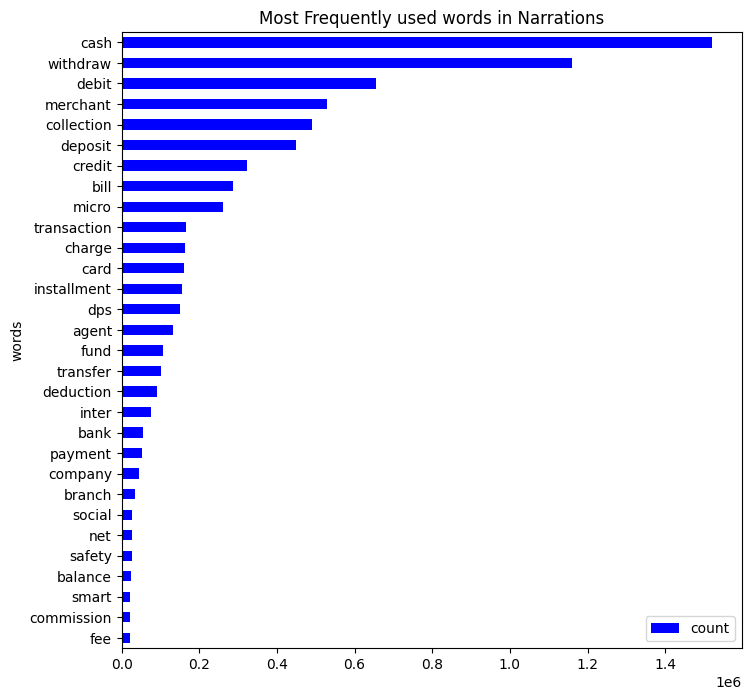

In [20]:
# visualize most frequent words

import itertools
import collections
import matplotlib.pyplot as plt

lemmatized_tokens = list(narrations)
token_list = list(itertools.chain(*lemmatized_tokens))
counts_no = collections.Counter(token_list)
clean_tweets = pd.DataFrame(counts_no.most_common (30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue')
ax.set_title("Most Frequently used words in Narrations")

plt.show()

**Featured Engineering**

**Word2Vec**

In [21]:
from gensim.models import Word2Vec

gensim_model = Word2Vec(sentences=narrations, workers=1, seed=42)

In [22]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(narrations, model=gensim_model)
len(vectorized_docs), len(vectorized_docs[0])

(2491432, 100)

**Clustering**

In [23]:
from sklearn.cluster import KMeans, MiniBatchKMeans, BisectingKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import scale

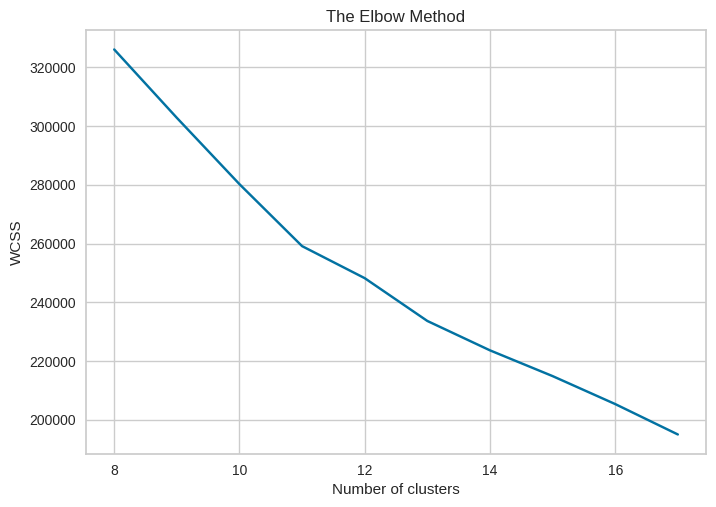

In [ ]:
# Elbow Method analysis

wcss = []

for i in range(8,18):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(vectorized_docs)
    wcss.append(kmeans.inertia_)

plt.plot(range(8,18),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

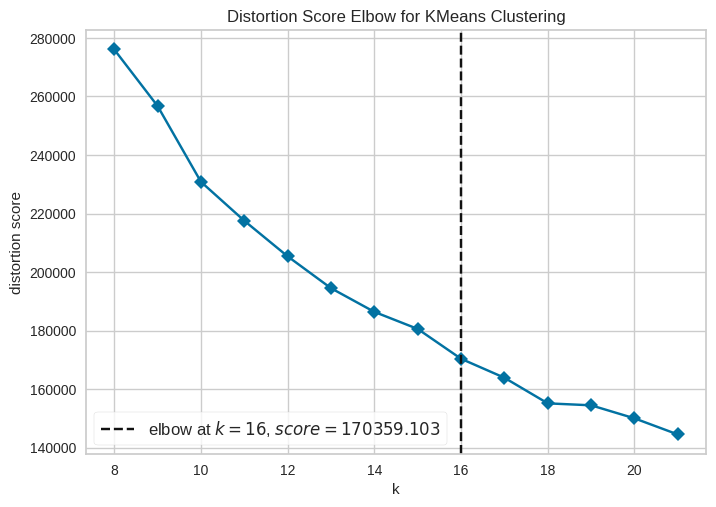

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(8,22), timings= False)
visualizer.fit(np.array(vectorized_docs))        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

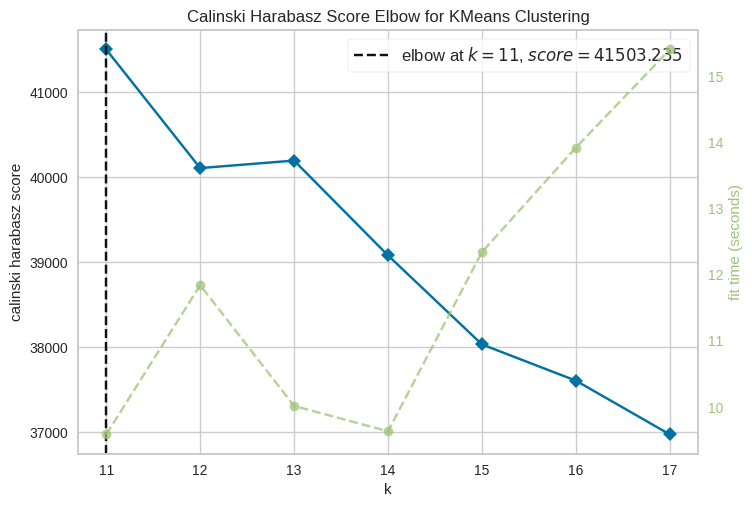

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
# calinski_harabasz score analysis

visualizer = KElbowVisualizer(model, k=(11,18),metric='calinski_harabasz', timings= True)
visualizer.fit(vectorized_docs)        # Fit the data to the visualizer
visualizer.show()

In [24]:
KMeans_cluster_size = 14
kmeans = KMeans(n_clusters=KMeans_cluster_size, n_init=14,random_state=42)
kmeans.fit(vectorized_docs)

KMeans(n_clusters=14, n_init=14, random_state=42)

In [25]:
df_clusters_KMeans = pd.DataFrame({
    "narrations": original_narrations,
    "tokens": narrations,
    "kmeans_cluster": kmeans.labels_
})

df_clusters_KMeans

,narrations,tokens,kmeans_cluster
0,SMS Charge Deduction For The Year,"[charge, deduction]",10
1,Cash Withdrawal From A/C No.:,"[cash, withdraw]",2
2,Cash Deposit to A/C No.:,"[cash, deposit]",5
3,Cash Deposit to A/C No.:,"[cash, deposit]",5
4,Cash Deposit,"[cash, deposit]",5
...,...,...,...
2491427,Debit Against Palli Bidyut Bill Collection.,"[debit, bill, collection]",1
2491428,NPSB Fund Transfer. NPS IncommingNPS IB,"[npsb, fund, transfer]",6
2491429,Sales commission --,[commission],2
2491430,Cash Withdraw,"[cash, withdraw]",2


560531 ['agent', 'cash', 'inter', 'withdraw'] [106387, 100557, 76663, 69127]
1162968 ['debit', 'collection', 'bill'] [344007, 343716, 285389]
956910 ['withdraw', 'cash'] [479060, 476806]
1042896 ['merchant', 'micro', 'cash', 'withdraw'] [260684, 260683, 258805, 258790]
713668 ['debit', 'card', 'transaction'] [305998, 161294, 150386]
837041 ['cash', 'deposit'] [412130, 407293]
196382 ['transfer', 'fund', 'smart', 'cap'] [38823, 38723, 21814, 20581]
39591 ['transfer', 'fund'] [20093, 17401]
537815 ['installment', 'dps', 'collection', 'withdraw'] [155022, 146040, 145972, 81536]
161341 ['payment', 'net', 'social', 'safety'] [40606, 26504, 26500, 26500]
191203 ['charge', 'deduction'] [93517, 91385]
150921 ['credit', 'remittance', 'remit'] [36632, 18467, 17404]
1085571 ['merchant', 'credit', 'cash', 'withdraw'] [268398, 268341, 259177, 259028]
201376 ['transfer', 'balance', 'agent'] [38089, 23473, 23308]


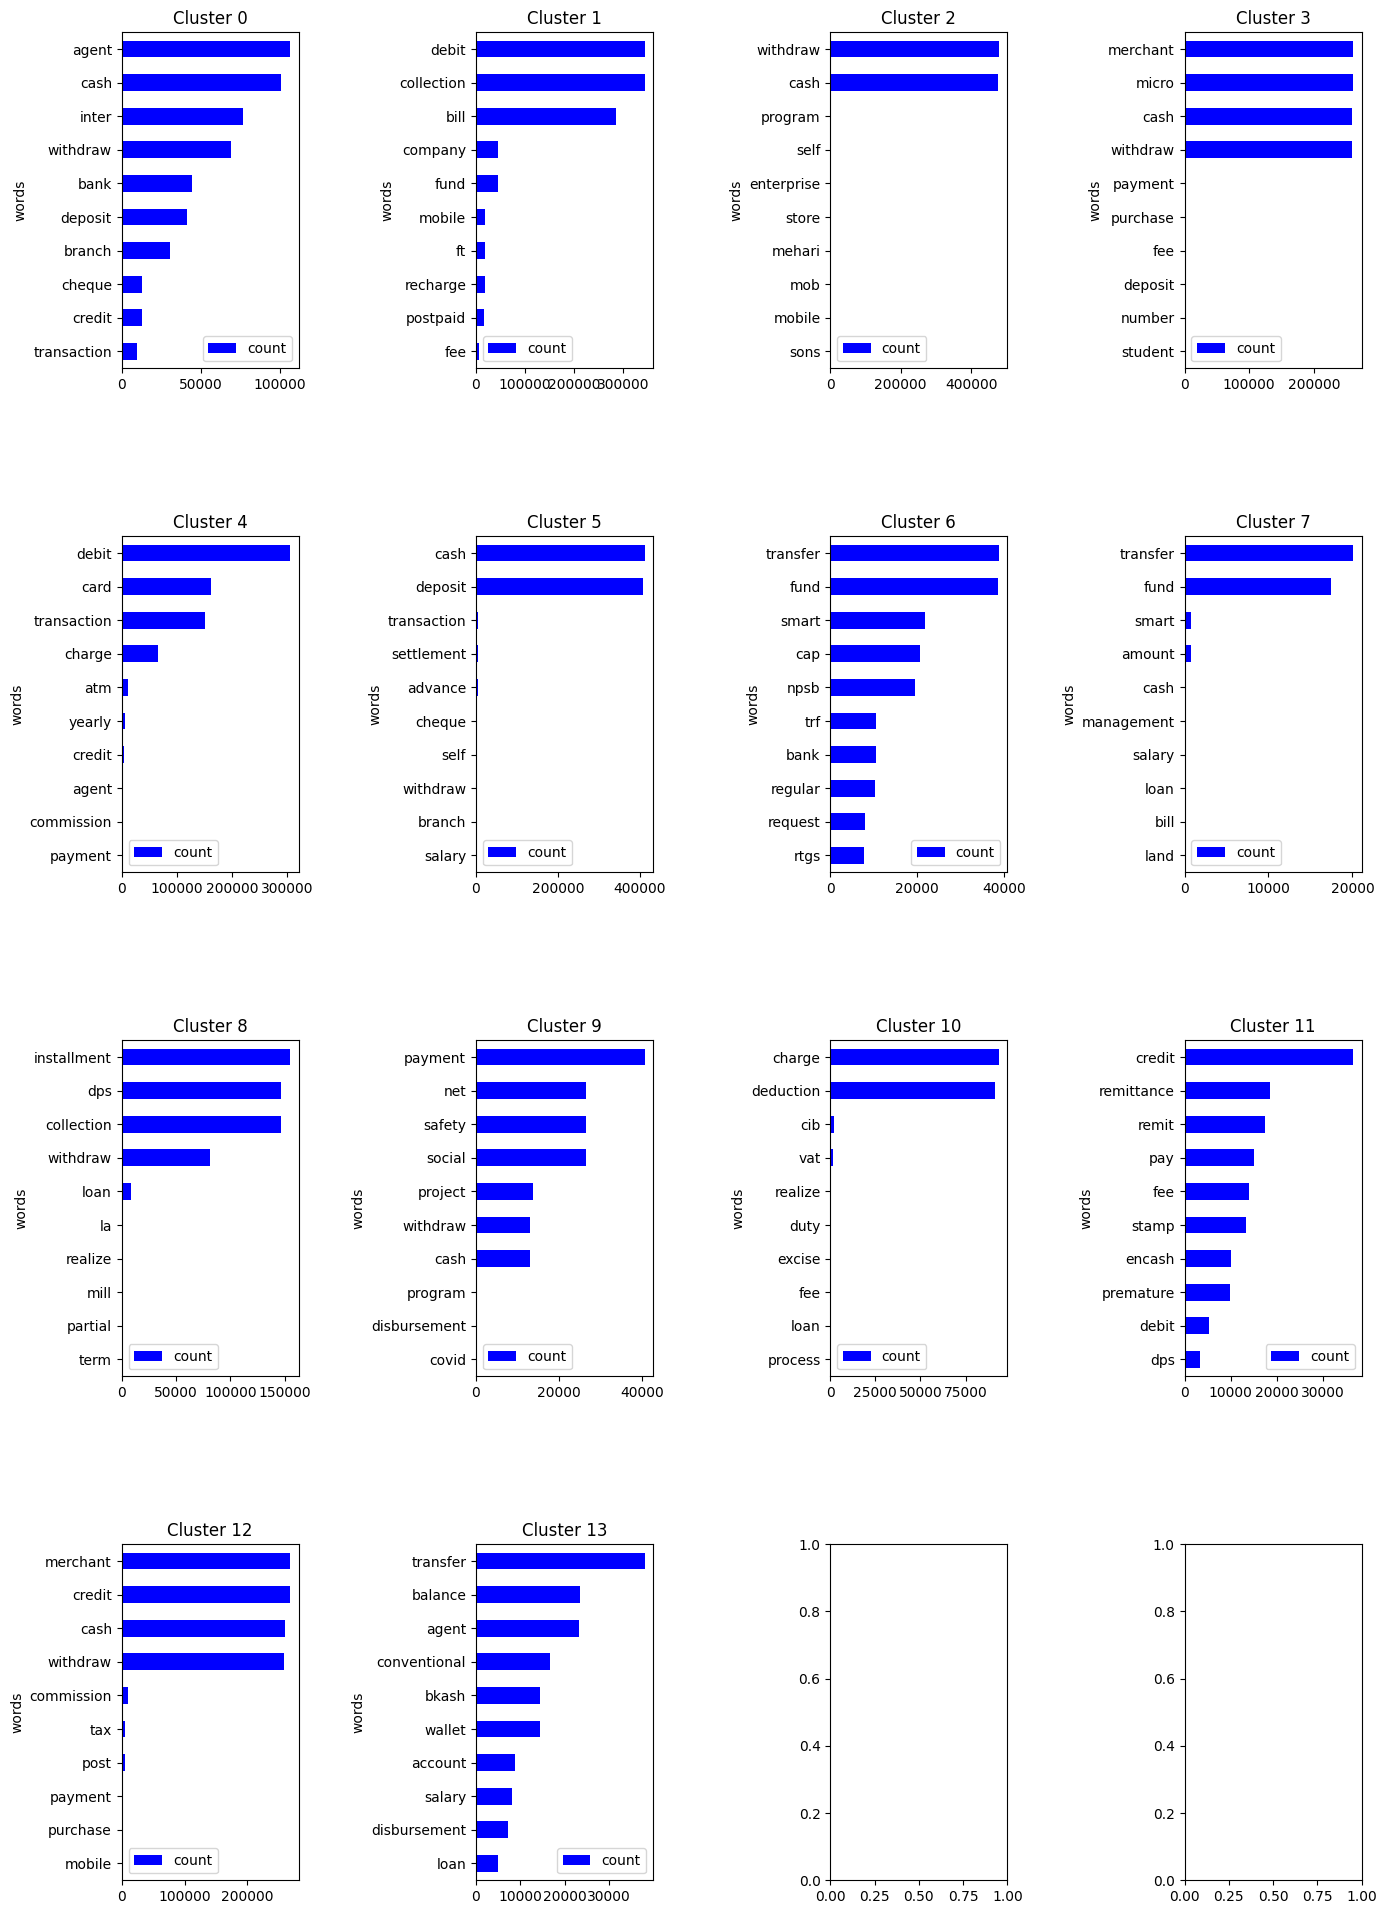

In [26]:
# frequency plot per cluster (K-means)

import itertools
import collections
import matplotlib.pyplot as plt

most_freq_words_kmeans = [[] for _ in range(KMeans_cluster_size)]

def perClusterPlot(arr,ax,title,clusterNo):
  lemmatized_tokens = list(arr['tokens'])
  token_list = list(itertools.chain(*lemmatized_tokens))
  counts_no = collections.Counter(token_list)
  clean_tweets = pd.DataFrame(counts_no.most_common (10), columns=['words', 'count'])
  clean_tweets.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue', title=title)
  s = sum(counts_no.values())
  vals = [x[1] for x in counts_no.most_common (10) if (x[1] / s * 100.0) > 10.0]
  if len(vals) == 0:
    keys = [x[0] for x in counts_no.most_common (3)]
  elif len(vals) > 4:
    keys = [x[0] for x in counts_no.most_common (4)]
  else:
    keys = [x[0] for x in counts_no.most_common (len(vals))]
  print(s, keys, vals)
  most_freq_words_kmeans[clusterNo].append(keys)


fig, ax = plt.subplots(nrows=int(KMeans_cluster_size / 4 + 1), ncols=4, figsize=(16, 24))
plt.subplots_adjust(wspace=1, hspace=0.5)
axe = ax.ravel()
for i in range(KMeans_cluster_size):
   perClusterPlot(df_clusters_KMeans[df_clusters_KMeans["kmeans_cluster"] == i], axe[i], "Cluster " + str(i), i)

plt.show()

**Mini Batch K Means**

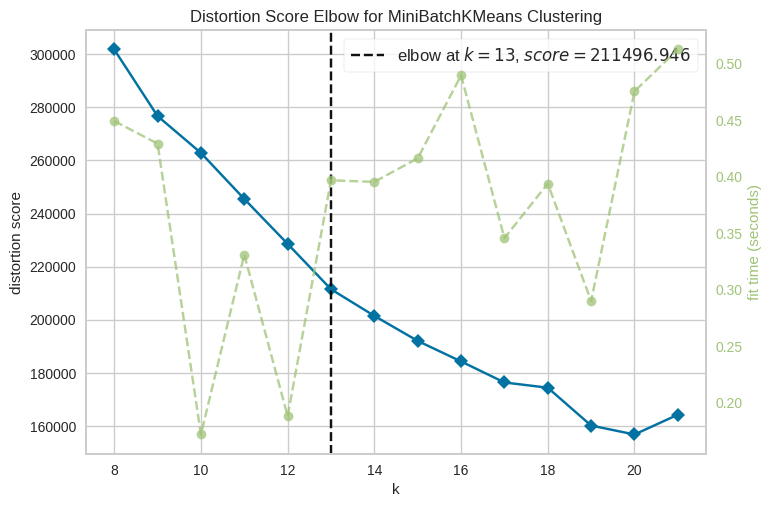

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = MiniBatchKMeans(batch_size=1024)
visualizer = KElbowVisualizer(model, k=(8,22), timings= True)
visualizer.fit(np.array(vectorized_docs))        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

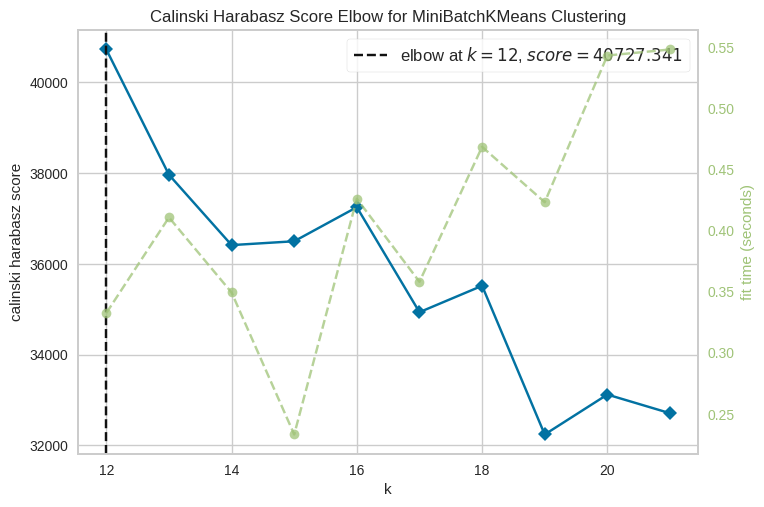

<Axes: title={'center': 'Calinski Harabasz Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
visualizer = KElbowVisualizer(model, k=(12,22), metric='calinski_harabasz', timings= True)
visualizer.fit(vectorized_docs)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [27]:
batch_cluster_size = 14

km_batch = MiniBatchKMeans(n_clusters=batch_cluster_size, batch_size=1024, max_iter = 200).fit(vectorized_docs)

df_clusters_minibatch = pd.DataFrame({
    "narrations": original_narrations,
    "tokens": narrations,
    "cluster": km_batch.labels_
})

df_clusters_minibatch

,narrations,tokens,cluster
0,SMS Charge Deduction For The Year,"[charge, deduction]",5
1,Cash Withdrawal From A/C No.:,"[cash, withdraw]",2
2,Cash Deposit to A/C No.:,"[cash, deposit]",4
3,Cash Deposit to A/C No.:,"[cash, deposit]",4
4,Cash Deposit,"[cash, deposit]",4
...,...,...,...
2491427,Debit Against Palli Bidyut Bill Collection.,"[debit, bill, collection]",1
2491428,NPSB Fund Transfer. NPS IncommingNPS IB,"[npsb, fund, transfer]",12
2491429,Sales commission --,[commission],2
2491430,Cash Withdraw,"[cash, withdraw]",2


1085583 ['merchant', 'credit', 'cash', 'withdraw'] [268398, 268345, 259177, 259028]
1162992 ['debit', 'collection', 'bill'] [344007, 343717, 285391]
956910 ['withdraw', 'cash'] [479060, 476806]
560650 ['agent', 'cash', 'inter', 'withdraw'] [106387, 100558, 76664, 69127]
837037 ['cash', 'deposit'] [412129, 407292]
191203 ['charge', 'deduction'] [93517, 91385]
537803 ['installment', 'dps', 'collection', 'withdraw'] [155019, 146040, 145972, 81536]
713672 ['debit', 'card', 'transaction'] [305999, 161294, 150386]
39603 ['transfer', 'fund'] [20096, 17404]
201211 ['transfer', 'balance', 'agent'] [38088, 23473, 23308]
150936 ['credit', 'remittance', 'remit'] [36632, 18467, 17404]
161341 ['payment', 'net', 'social', 'safety'] [40606, 26504, 26500, 26500]
196382 ['transfer', 'fund', 'smart', 'cap'] [38823, 38723, 21814, 20581]
1042891 ['merchant', 'micro', 'cash', 'withdraw'] [260684, 260683, 258804, 258790]


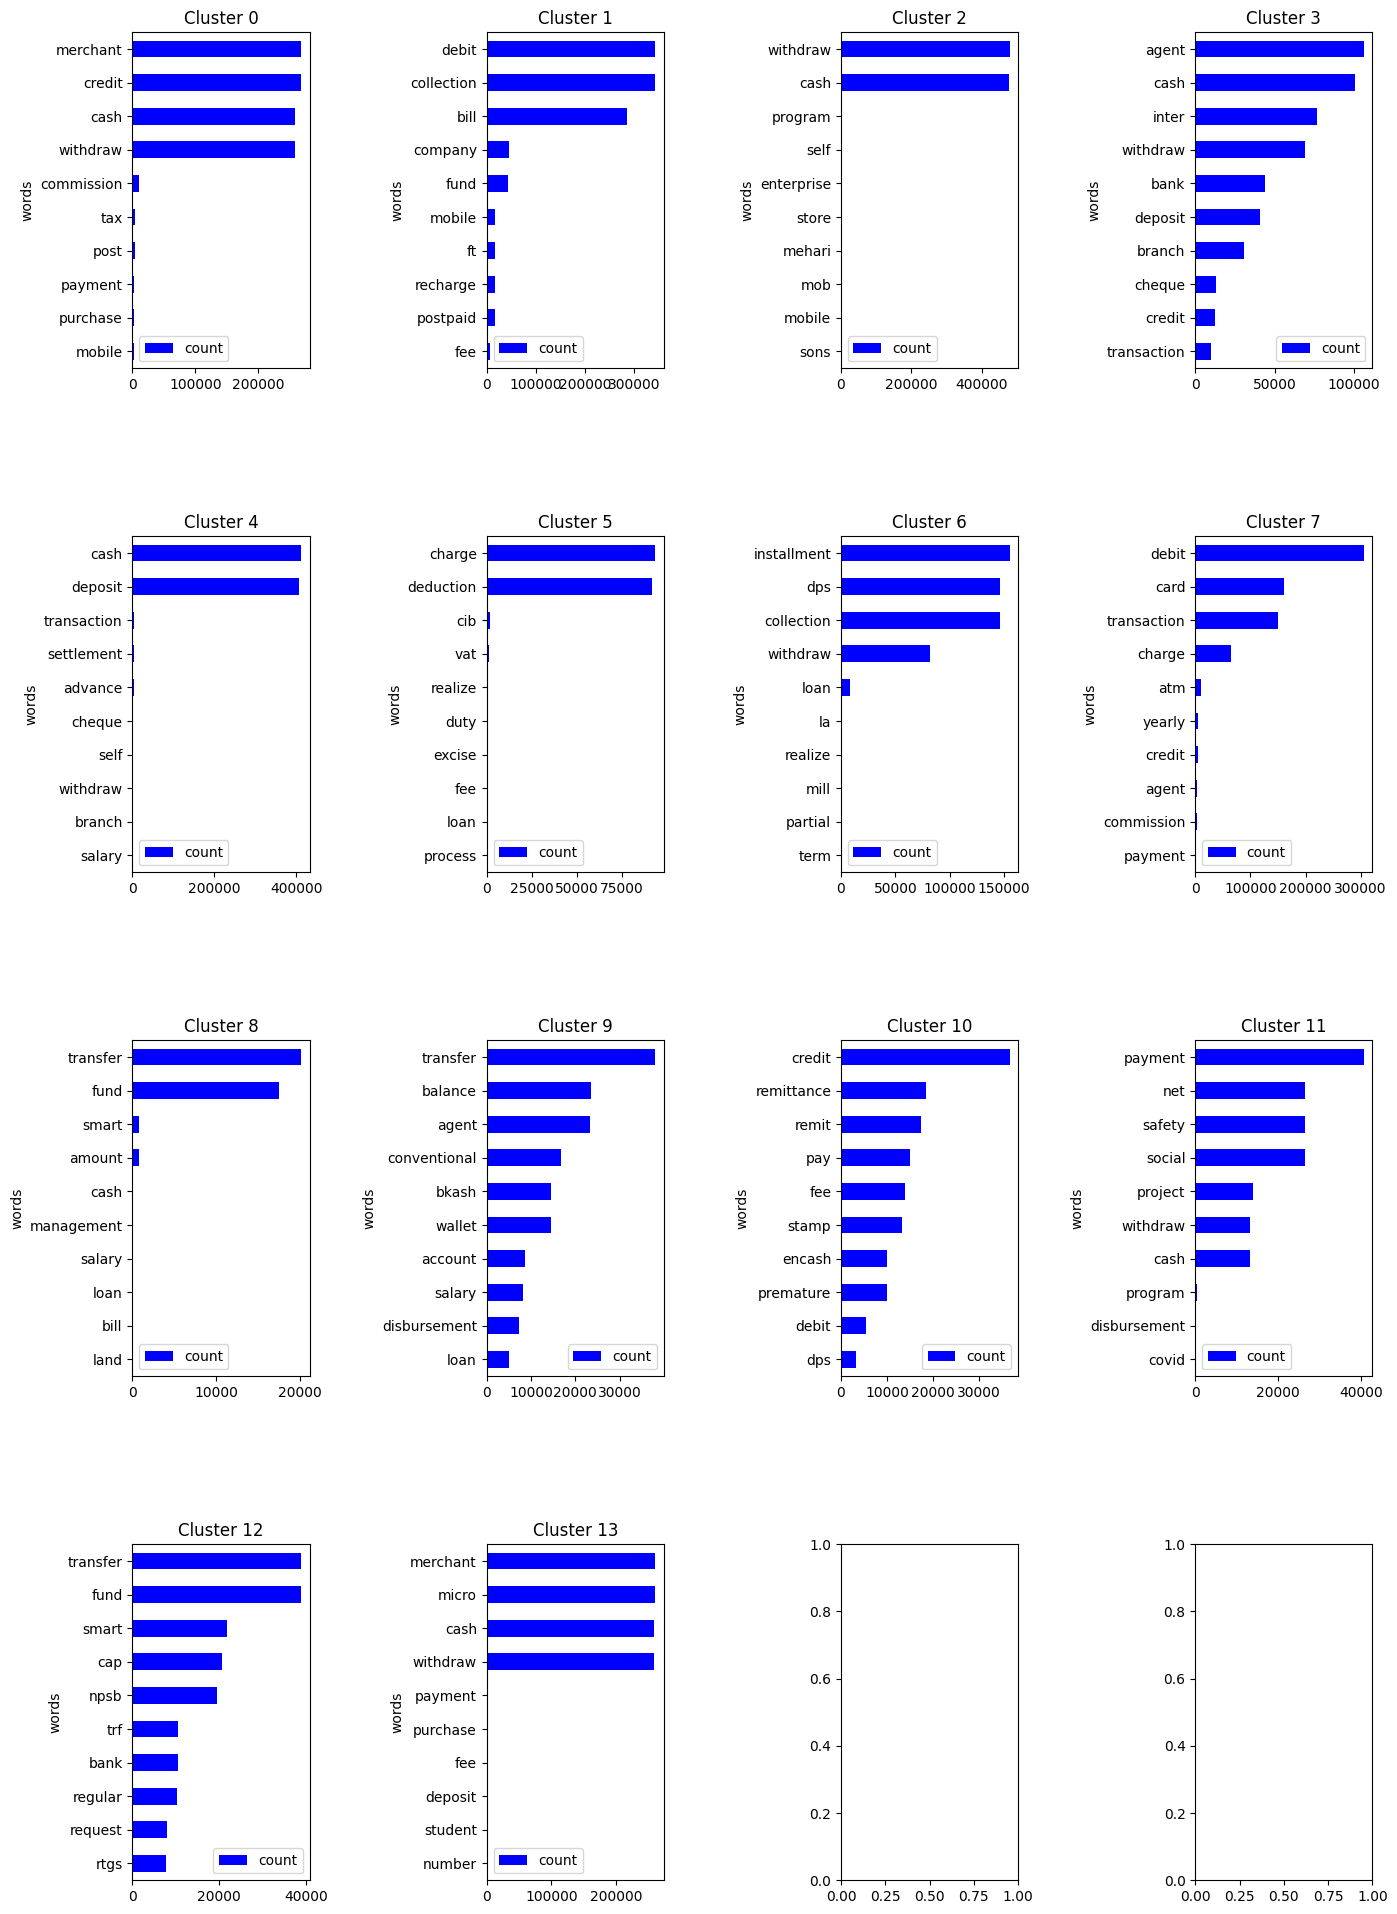

In [28]:
# frequency plot per cluster (mini batch K-means)

import itertools
import collections
import matplotlib.pyplot as plt

most_freq_words_minibatch = [[] for _ in range(batch_cluster_size)]

def perClusterPlot(arr,ax,title, clusterNo):
  lemmatized_tokens = list(arr['tokens'])
  token_list = list(itertools.chain(*lemmatized_tokens))
  counts_no = collections.Counter(token_list)
  clean_tweets = pd.DataFrame(counts_no.most_common (10), columns=['words', 'count'])
  clean_tweets.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue', title=title)
  s = sum(counts_no.values())
  vals = [x[1] for x in counts_no.most_common (10) if (x[1] / s * 100.0) > 10.0]
  if len(vals) == 0:
    keys = [x[0] for x in counts_no.most_common (3)]
  elif len(vals) > 4:
    keys = [x[0] for x in counts_no.most_common (4)]
  else:
    keys = [x[0] for x in counts_no.most_common (len(vals))]
  print(s, keys, vals)
  most_freq_words_minibatch[clusterNo].append(keys)


fig, ax = plt.subplots(nrows=int(batch_cluster_size / 4 + 1), ncols=4, figsize=(16, 24))
plt.subplots_adjust(wspace=1, hspace=0.5)
axe = ax.ravel()
for i in range(batch_cluster_size):
   perClusterPlot(df_clusters_minibatch[df_clusters_minibatch["cluster"] == i], axe[i], "Cluster " + str(i), i)

plt.show()

**BisectingKMeans Clustering**

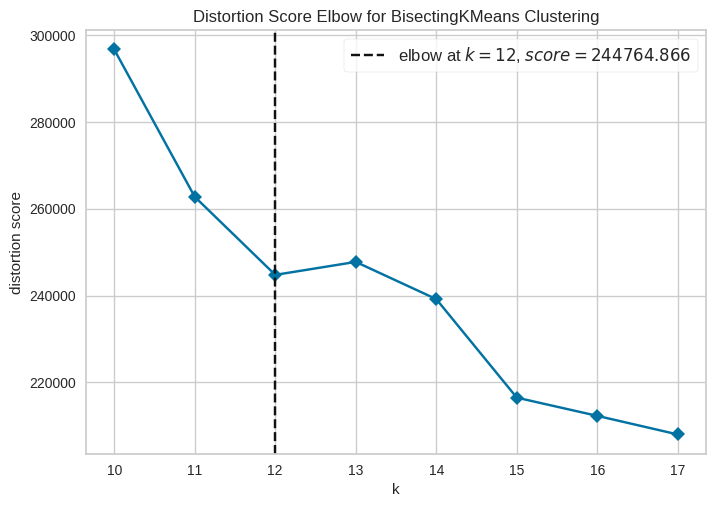

<Axes: title={'center': 'Distortion Score Elbow for BisectingKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = BisectingKMeans()
visualizer = KElbowVisualizer(model, k=(10,18), timings= False)
visualizer.fit(np.array(vectorized_docs))        # Fit data to visualizer
visualizer.show()

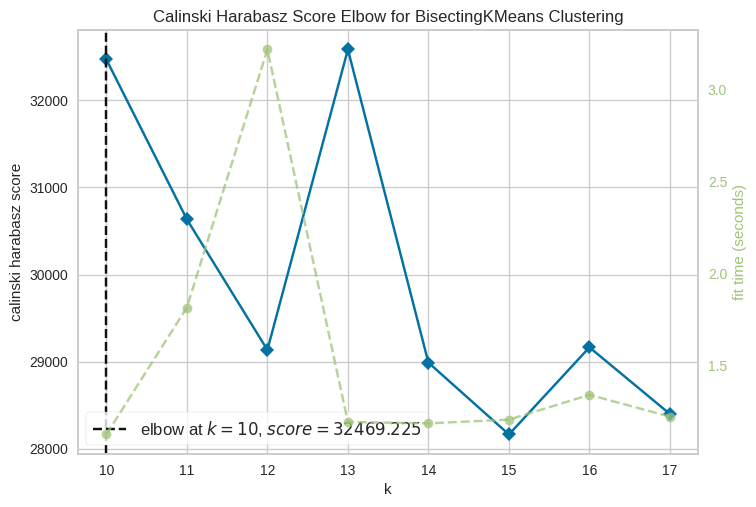

<Axes: title={'center': 'Calinski Harabasz Score Elbow for BisectingKMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
visualizer = KElbowVisualizer(model, k=(10,18), metric='calinski_harabasz', timings= True)
visualizer.fit(np.array(vectorized_docs))        # Fit data to visualizer
visualizer.show() 

In [29]:
bisect_cluster_size = 14

bisect_clustering = BisectingKMeans(n_clusters=bisect_cluster_size, n_init = 10, random_state=42).fit(vectorized_docs)

df_clusters_bisect = pd.DataFrame({
    "narrations": original_narrations,
    "tokens": narrations,
    "cluster": bisect_clustering.labels_
})

df_clusters_bisect

,narrations,tokens,cluster
0,SMS Charge Deduction For The Year,"[charge, deduction]",7
1,Cash Withdrawal From A/C No.:,"[cash, withdraw]",5
2,Cash Deposit to A/C No.:,"[cash, deposit]",1
3,Cash Deposit to A/C No.:,"[cash, deposit]",1
4,Cash Deposit,"[cash, deposit]",1
...,...,...,...
2491427,Debit Against Palli Bidyut Bill Collection.,"[debit, bill, collection]",9
2491428,NPSB Fund Transfer. NPS IncommingNPS IB,"[npsb, fund, transfer]",11
2491429,Sales commission --,[commission],5
2491430,Cash Withdraw,"[cash, withdraw]",5


584483 ['agent', 'cash', 'inter', 'withdraw'] [111374, 100565, 74175, 69094]
837030 ['cash', 'deposit'] [412122, 407269]
112407 ['credit', 'remittance', 'remit', 'pay'] [30987, 18226, 17404, 14836, 12853, 12841]
1157553 ['cash', 'withdraw', 'merchant', 'credit'] [272296, 272160, 268396, 265435]
1043073 ['merchant', 'micro', 'cash', 'withdraw'] [260683, 260682, 258829, 258810]
956972 ['withdraw', 'cash'] [479063, 476828]
806773 ['debit', 'card', 'transaction'] [323809, 161306, 155655]
192336 ['charge', 'deduction'] [93521, 91665]
82750 ['payment', 'project', 'net', 'social'] [27493, 13801, 13387, 13384, 13384]
1125907 ['collection', 'debit', 'bill'] [343735, 331547, 285980]
551983 ['installment', 'dps', 'collection', 'withdraw'] [155024, 149577, 145972, 81536]
75784 ['transfer', 'fund', 'npsb'] [31293, 28577, 8194]
168860 ['transfer', 'fund', 'smart', 'cap'] [29906, 29812, 21319, 20581]
142303 ['transfer', 'balance', 'agent', 'bkash'] [29641, 14686, 14611, 14527, 14519]


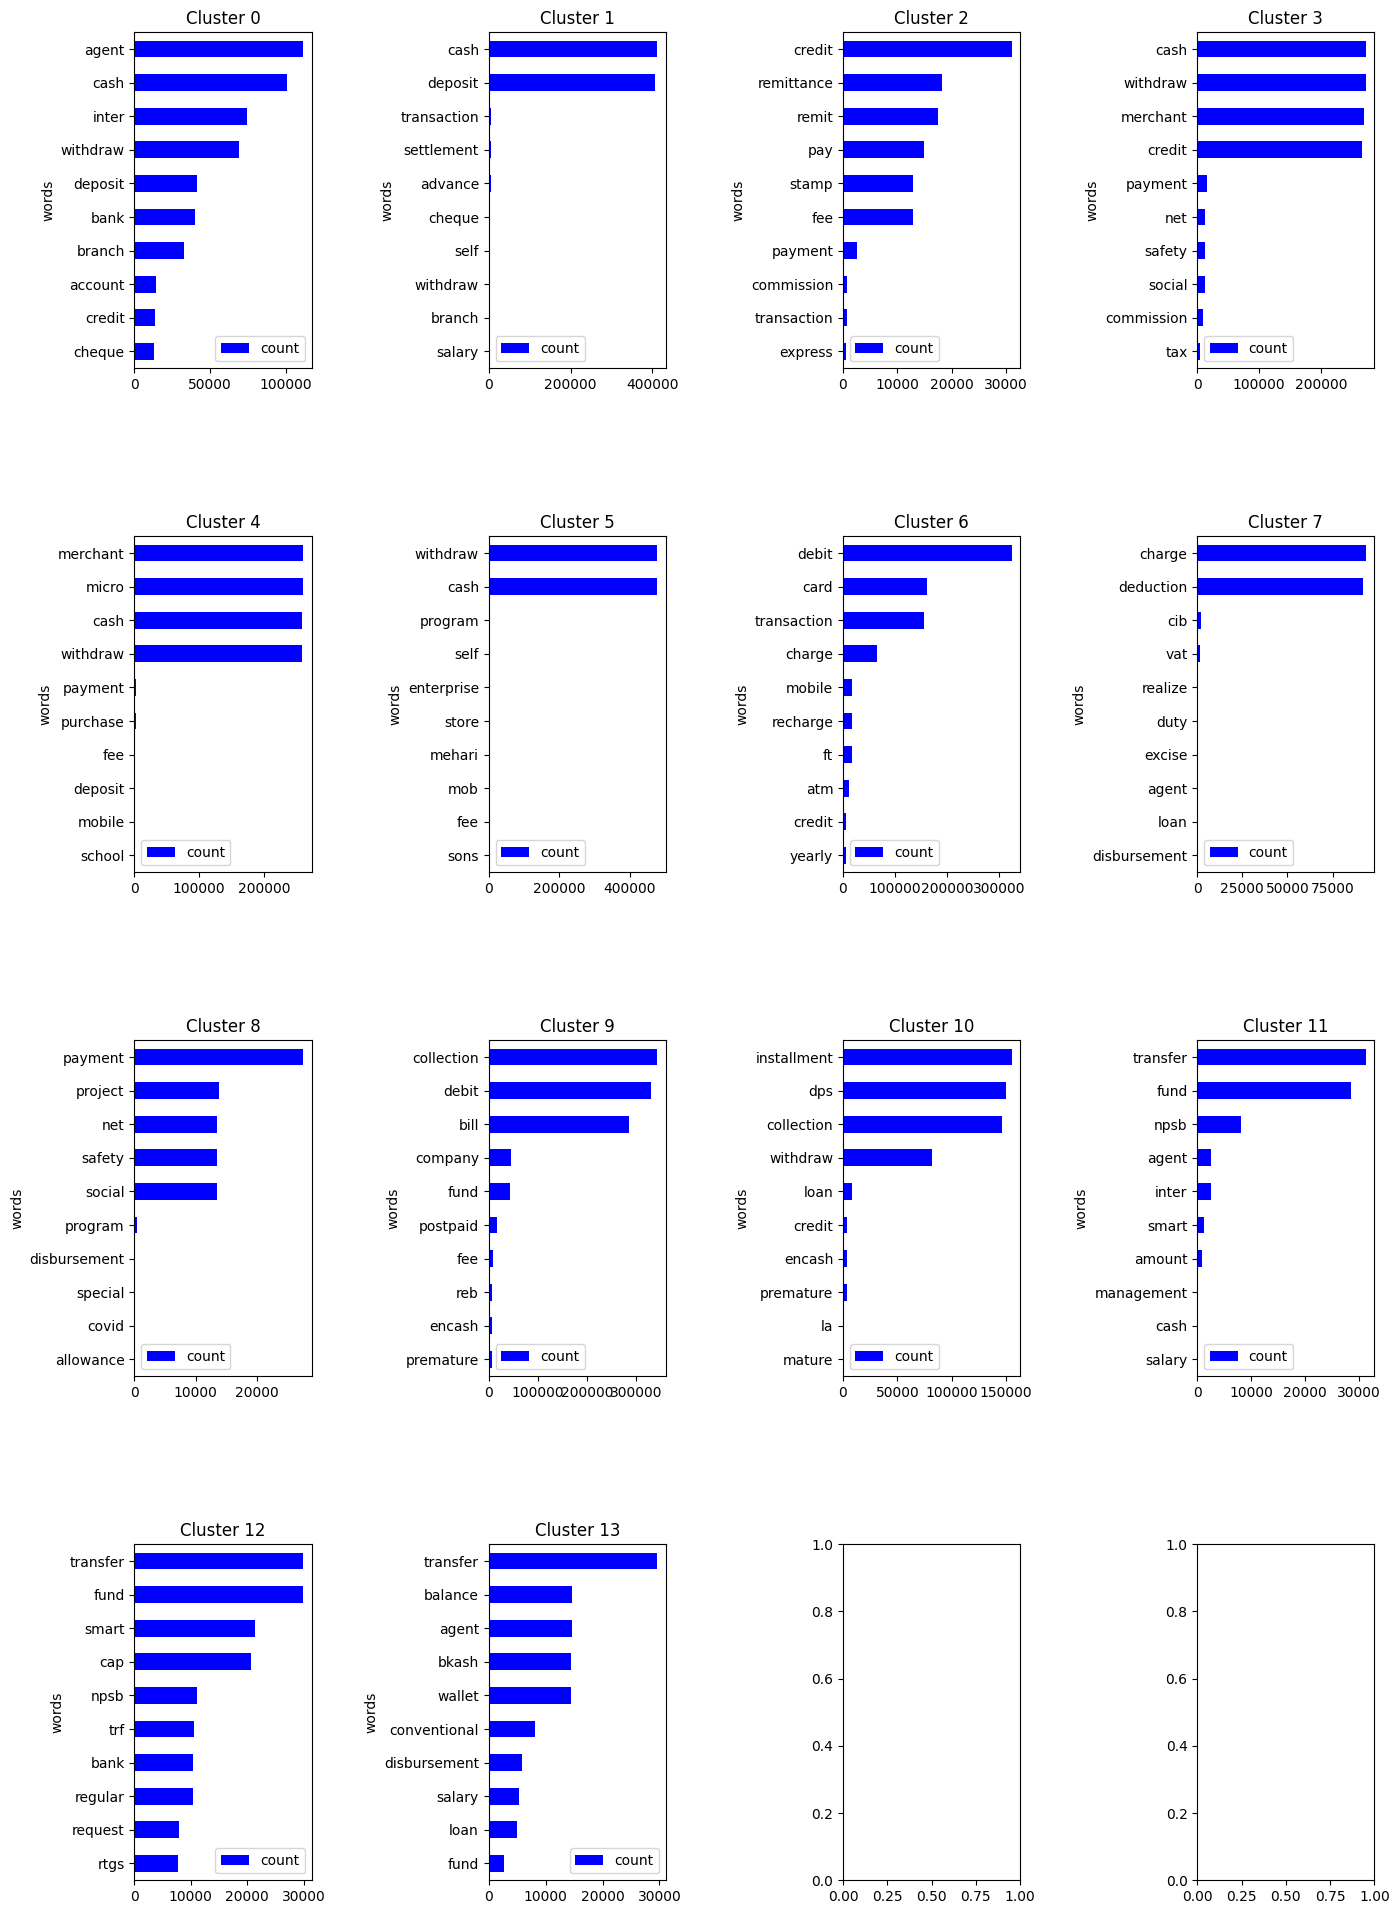

In [31]:
# frequency plot per cluster (bisect kmeans)

import itertools
import collections
import matplotlib.pyplot as plt

most_freq_words_bisect = [[] for _ in range(bisect_cluster_size)]

def perClusterPlot(arr,ax,title,clusterNo):
  lemmatized_tokens = list(arr['tokens'])
  token_list = list(itertools.chain(*lemmatized_tokens))
  counts_no = collections.Counter(token_list)
  clean_tweets = pd.DataFrame(counts_no.most_common (10), columns=['words', 'count'])
  clean_tweets.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue', title=title)
  s = sum(counts_no.values())
  vals = [x[1] for x in counts_no.most_common (10) if (x[1] / s * 100.0) > 10.0]
  if len(vals) == 0:
    keys = [x[0] for x in counts_no.most_common (3)]
  elif len(vals) > 4:
    keys = [x[0] for x in counts_no.most_common (4)]
  else:
    keys = [x[0] for x in counts_no.most_common (len(vals))]
  print(s, keys, vals)
  most_freq_words_bisect[clusterNo].append(keys)


fig, ax = plt.subplots(nrows=int(bisect_cluster_size / 4 + 1), ncols=4, figsize=(16, 24))
plt.subplots_adjust(wspace=1, hspace=0.5)
axe = ax.ravel()
for i in range(bisect_cluster_size):
   perClusterPlot(df_clusters_bisect[df_clusters_bisect["cluster"] == i], axe[i], "Cluster " + str(i), i)

plt.show()

**Store all results**

In [32]:
df_clusters_all = pd.DataFrame({
    "narrations": original_narrations,
    "tokens": narrations,
    "kmeans_cluster": kmeans.labels_,
    "minibatch_cluster": km_batch.labels_,
    "bisect_cluster": bisect_clustering.labels_
})
    
df_clusters_all["kmeans_keywords_per_cluster"] =  df_clusters_all.apply(lambda x: most_freq_words_kmeans[x['kmeans_cluster']], axis=1)
df_clusters_all["minibatch_keywords_per_cluster"] =  df_clusters_all.apply(lambda x: most_freq_words_minibatch[x['minibatch_cluster']], axis=1)
df_clusters_all["bisect_keywords_per_cluster"] =  df_clusters_all.apply(lambda x: most_freq_words_bisect[x['bisect_cluster']], axis=1)


df_clusters_all

,narrations,tokens,kmeans_cluster,minibatch_cluster,bisect_cluster,kmeans_keywords_per_cluster,minibatch_keywords_per_cluster,bisect_keywords_per_cluster
0,SMS Charge Deduction For The Year,"[charge, deduction]",10,5,7,"[[charge, deduction]]","[[charge, deduction]]","[[charge, deduction]]"
1,Cash Withdrawal From A/C No.:,"[cash, withdraw]",2,2,5,"[[withdraw, cash]]","[[withdraw, cash]]","[[withdraw, cash]]"
2,Cash Deposit to A/C No.:,"[cash, deposit]",5,4,1,"[[cash, deposit]]","[[cash, deposit]]","[[cash, deposit]]"
3,Cash Deposit to A/C No.:,"[cash, deposit]",5,4,1,"[[cash, deposit]]","[[cash, deposit]]","[[cash, deposit]]"
4,Cash Deposit,"[cash, deposit]",5,4,1,"[[cash, deposit]]","[[cash, deposit]]","[[cash, deposit]]"
...,...,...,...,...,...,...,...,...
2491427,Debit Against Palli Bidyut Bill Collection.,"[debit, bill, collection]",1,1,9,"[[debit, collection, bill]]","[[debit, collection, bill]]","[[collection, debit, bill]]"
2491428,NPSB Fund Transfer. NPS IncommingNPS IB,"[npsb, fund, transfer]",6,12,11,"[[transfer, fund, smart, cap]]","[[transfer, fund, smart, cap]]","[[transfer, fund, npsb]]"
2491429,Sales commission --,[commission],2,2,5,"[[withdraw, cash]]","[[withdraw, cash]]","[[withdraw, cash]]"
2491430,Cash Withdraw,"[cash, withdraw]",2,2,5,"[[withdraw, cash]]","[[withdraw, cash]]","[[withdraw, cash]]"


In [33]:
df_clusters_all.to_csv("all_result.csv")

In [34]:
import pickle

filename = 'kmeans_model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

filename = 'minibatch_model.sav'
pickle.dump(km_batch, open(filename, 'wb'))

filename = 'bisect_model.sav'
pickle.dump(bisect_clustering, open(filename, 'wb'))

filename = 'gensim_model.sav'
pickle.dump(gensim_model, open(filename, 'wb'))

filename = 'most_freq_kmeans.txt'
pickle.dump(most_freq_words_kmeans, open(filename, 'wb'))

filename = 'most_freq_minibatch.txt'
pickle.dump(most_freq_words_minibatch, open(filename, 'wb'))

filename = 'most_freq_bisect.txt'
pickle.dump(most_freq_words_bisect, open(filename, 'wb'))

**prediction of data**

In [35]:
# load test file

test_path = "/content/drive/MyDrive/Colab Notebooks/Test.csv"
df_test = pd.read_csv(test_path)
df_test.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6
0,1,1175256,342800.0,1-Nov-22,Cash Withdrawal From A/C No.:,Credit,1
1,2,2298226,1500.0,1-Nov-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit,9
2,3,4066427,1500.0,1-Nov-22,Credit Against Merchant Cash Withdraw Service ...,Credit,9
3,4,1978564,2550.0,1-Nov-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit,9
4,5,4890311,2550.0,1-Nov-22,Credit Against Merchant Cash Withdraw Service ...,Credit,9


In [36]:
# preprocessing and vectorization

test_narrations = df_test["0.4"]

preprocessed = []
for te in test_narrations:
  preprocessed.append(preprocess(te))

loaded_model = pickle.load(open('gensim_model.sav', 'rb'))

vectorized_test = vectorize(preprocessed, model=loaded_model)
len(vectorized_test), len(vectorized_test[0])

(55, 100)

**KMeans Prediction**

In [38]:
loaded_model = pickle.load(open('kmeans_model.sav', 'rb'))

test_kmeans_labels = loaded_model.predict(vectorized_test)
test_kmeans_labels

array([ 2,  3, 12,  3, 12,  5,  5,  5, 12,  3, 12,  4,  2,  1,  0,  3, 12,
        5,  5,  0,  2,  0,  1,  0,  2,  4, 12, 12,  9,  9,  2,  2,  5,  5,
        1,  0,  2,  3, 12,  3, 12,  5,  5,  0, 10,  3, 13,  1,  9,  4, 13,
       11,  8,  0, 13], dtype=int32)

In [39]:
df_clusters_KMeans_test = pd.DataFrame({
    "narrations": df_test["0.4"],
    "test_labels": df_test["0.6"],
    "kmeans_cluster": test_kmeans_labels
})

df_clusters_KMeans_test

,narrations,test_labels,kmeans_cluster
0,Cash Withdrawal From A/C No.:,1,2
1,"Cash withdraw from Micro Merchant point, MM A/C",9,3
2,Credit Against Merchant Cash Withdraw Service ...,9,12
3,"Cash withdraw from Micro Merchant point, MM A/C",9,3
4,Credit Against Merchant Cash Withdraw Service ...,9,12
5,Cash Deposit to A/C No.:,2,5
6,Cash Deposit,2,5
7,Cash Deposit to A/C No.:,2,5
8,Credit Against Merchant Purchase Payment Servi...,10,12
9,"Cash withdraw from Micro Merchant point, MM A/C",9,3


**Minibatch KMeans Prediction**

In [40]:
loaded_model = pickle.load(open('minibatch_model.sav', 'rb'))

test_minibatch_labels = loaded_model.predict(vectorized_test)
test_minibatch_labels

array([ 2, 13,  0, 13,  0,  4,  4,  4,  0, 13,  0,  7,  2,  1,  3, 13,  0,
        4,  4,  3,  2,  3,  1,  3,  2,  7,  0,  0, 11, 11,  2,  2,  4,  4,
        1,  3,  2, 13,  0, 13,  0,  4,  4,  3,  5, 13,  9,  1, 11,  7,  9,
       10,  6,  3,  9], dtype=int32)

In [41]:
df_clusters_minibatch_test = pd.DataFrame({
    "narrations": df_test["0.4"],
    "test_labels": df_test["0.6"],
    "minibatch_cluster": test_minibatch_labels
})

df_clusters_minibatch_test

,narrations,test_labels,minibatch_cluster
0,Cash Withdrawal From A/C No.:,1,2
1,"Cash withdraw from Micro Merchant point, MM A/C",9,13
2,Credit Against Merchant Cash Withdraw Service ...,9,0
3,"Cash withdraw from Micro Merchant point, MM A/C",9,13
4,Credit Against Merchant Cash Withdraw Service ...,9,0
5,Cash Deposit to A/C No.:,2,4
6,Cash Deposit,2,4
7,Cash Deposit to A/C No.:,2,4
8,Credit Against Merchant Purchase Payment Servi...,10,0
9,"Cash withdraw from Micro Merchant point, MM A/C",9,13


**Bisect KMeans Prediction**

In [42]:
loaded_model = pickle.load(open('bisect_model.sav', 'rb'))

test_bisect_labels = loaded_model.predict(vectorized_test)
test_bisect_labels

array([ 5,  4,  3,  4,  3,  1,  1,  1,  3,  4,  3,  6,  5,  9,  0,  4,  3,
        1,  1,  0,  5,  0,  9,  0,  5,  6,  3,  3,  3,  8,  5,  5,  1,  1,
        9,  0,  5,  4,  3,  4,  3,  1,  1,  0,  7,  4, 13,  9,  8,  6, 13,
        2, 10,  0, 13], dtype=int32)

In [43]:
df_clusters_bisect_test = pd.DataFrame({
    "narrations": df_test["0.4"],
    "test_labels": df_test["0.6"],
    "bisect_cluster": test_bisect_labels
})

df_clusters_bisect_test

,narrations,test_labels,bisect_cluster
0,Cash Withdrawal From A/C No.:,1,5
1,"Cash withdraw from Micro Merchant point, MM A/C",9,4
2,Credit Against Merchant Cash Withdraw Service ...,9,3
3,"Cash withdraw from Micro Merchant point, MM A/C",9,4
4,Credit Against Merchant Cash Withdraw Service ...,9,3
5,Cash Deposit to A/C No.:,2,1
6,Cash Deposit,2,1
7,Cash Deposit to A/C No.:,2,1
8,Credit Against Merchant Purchase Payment Servi...,10,3
9,"Cash withdraw from Micro Merchant point, MM A/C",9,4


**Store Test Result**

In [44]:
df_clusters_all_test = pd.DataFrame({
    "narrations": df_test["0.4"],
    "tokens": preprocessed,
    "test_labels": df_test["0.6"],
    "kmeans_cluster": test_kmeans_labels,
    "minibatch_cluster": test_minibatch_labels,
    "bisect_cluster": test_bisect_labels
})

df_clusters_all_test["kmeans_keywords_per_cluster"] =  df_clusters_all_test.apply(lambda x: most_freq_words_kmeans[x['kmeans_cluster']], axis=1)
df_clusters_all_test["minibatch_keywords_per_cluster"] =  df_clusters_all_test.apply(lambda x: most_freq_words_minibatch[x['minibatch_cluster']], axis=1)
df_clusters_all_test["bisect_keywords_per_cluster"] =  df_clusters_all_test.apply(lambda x: most_freq_words_bisect[x['bisect_cluster']], axis=1)

df_clusters_all_test

,narrations,tokens,test_labels,kmeans_cluster,minibatch_cluster,bisect_cluster,kmeans_keywords_per_cluster,minibatch_keywords_per_cluster,bisect_keywords_per_cluster
0,Cash Withdrawal From A/C No.:,"[cash, withdraw]",1,2,2,5,"[[withdraw, cash]]","[[withdraw, cash]]","[[withdraw, cash]]"
1,"Cash withdraw from Micro Merchant point, MM A/C","[cash, withdraw, micro, merchant]",9,3,13,4,"[[merchant, micro, cash, withdraw]]","[[merchant, micro, cash, withdraw]]","[[merchant, micro, cash, withdraw]]"
2,Credit Against Merchant Cash Withdraw Service ...,"[credit, merchant, cash, withdraw]",9,12,0,3,"[[merchant, credit, cash, withdraw]]","[[merchant, credit, cash, withdraw]]","[[cash, withdraw, merchant, credit]]"
3,"Cash withdraw from Micro Merchant point, MM A/C","[cash, withdraw, micro, merchant]",9,3,13,4,"[[merchant, micro, cash, withdraw]]","[[merchant, micro, cash, withdraw]]","[[merchant, micro, cash, withdraw]]"
4,Credit Against Merchant Cash Withdraw Service ...,"[credit, merchant, cash, withdraw]",9,12,0,3,"[[merchant, credit, cash, withdraw]]","[[merchant, credit, cash, withdraw]]","[[cash, withdraw, merchant, credit]]"
5,Cash Deposit to A/C No.:,"[cash, deposit]",2,5,4,1,"[[cash, deposit]]","[[cash, deposit]]","[[cash, deposit]]"
6,Cash Deposit,"[cash, deposit]",2,5,4,1,"[[cash, deposit]]","[[cash, deposit]]","[[cash, deposit]]"
7,Cash Deposit to A/C No.:,"[cash, deposit]",2,5,4,1,"[[cash, deposit]]","[[cash, deposit]]","[[cash, deposit]]"
8,Credit Against Merchant Purchase Payment Servi...,"[credit, merchant, purchase, payment]",10,12,0,3,"[[merchant, credit, cash, withdraw]]","[[merchant, credit, cash, withdraw]]","[[cash, withdraw, merchant, credit]]"
9,"Cash withdraw from Micro Merchant point, MM A/C","[cash, withdraw, micro, merchant]",9,3,13,4,"[[merchant, micro, cash, withdraw]]","[[merchant, micro, cash, withdraw]]","[[merchant, micro, cash, withdraw]]"


In [45]:
df_clusters_all_test.to_csv('test_result.csv')

In [46]:
loaded_txt = pickle.load(open('most_freq_kmeans.txt', 'rb'))
print(loaded_txt)

[[['agent', 'cash', 'inter', 'withdraw']], [['debit', 'collection', 'bill']], [['withdraw', 'cash']], [['merchant', 'micro', 'cash', 'withdraw']], [['debit', 'card', 'transaction']], [['cash', 'deposit']], [['transfer', 'fund', 'smart', 'cap']], [['transfer', 'fund']], [['installment', 'dps', 'collection', 'withdraw']], [['payment', 'net', 'social', 'safety']], [['charge', 'deduction']], [['credit', 'remittance', 'remit']], [['merchant', 'credit', 'cash', 'withdraw']], [['transfer', 'balance', 'agent']]]


**Submission Preparation**

In [ ]:
# !pip freeze > requirements.txt

In [ ]:
# !pip install pipreqs

In [ ]:
# !pipreqs . --force

In [ ]:
# !pip install session-info

In [ ]:
# import session_info
# session_info.show()

In [ ]:
# !pipreqs --force

In [44]:
while 1:
  pass

KeyboardInterrupt: ignored